# Analyse info site Crowd funding

## Objectif:

- Identifier et ordonner les thèmes:
    - par dons totaux.
    - par nombre de backers.
    - par dons per backers.
    



## Bibliothèques:

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## Base de données:

In [2]:
df = pd.read_csv('indie_scrap_01-2022_v3').drop(['Unnamed: 0'],axis = 1)

In [3]:
df.head()

,Tag,Nom_projet,Objectif,Devise,Percent,Duree_collecte,Duree_restante,Nb_backers,Perk_price,Nb_discussion,Nb_perk,Prix_moyen_perk,montant_collecte
0,"['computers', 'laptops', 'pc']",odin-the-ultimate-gaming-handheld,100000,HKD,5027,45,0,5234,"[390, 1550, 1628, 1870, 2142, 2251, 2329, 2804]",4788,8,1870,5027000.00
1,['fantasy'],brandon-sanderson-s-white-sand-graphic-novel,10000,USD,2362,21,16,2617,"[85, 40, 45, 65, 85]",185,5,64,236200.00
2,[],the-michigan-g-men-new-album,10000,USD,60,60,0,56,"[10, 30, 50, 100, 300, 1000, 10000]",0,7,1641,6000.00
3,[],detroit-deep-house-fundraiser,501,USD,114,54,0,10,[25],2,1,25,571.14
4,"['cars', 'wireless']",aawireless,220000,USD,295,45,0,56479,"[85, 170]",0,2,127,649000.00


## Trame:


### I. Revue des données
### II. Etude et mise en forme des tags pour les regrouper en thèmes
### III. Analyse et présentation

###########################################################################################################################

## I. Revue des données

In [4]:
# On vérifie la présence de NaN
df.isna().sum()

Tag                 0
Nom_projet          0
Objectif            0
Devise              0
Percent             0
Duree_collecte      0
Duree_restante      0
Nb_backers          0
Perk_price          0
Nb_discussion       0
Nb_perk             0
Prix_moyen_perk     0
montant_collecte    0
dtype: int64

In [5]:
# On vérifie la présence de doublon
print(df[df.duplicated()])

                                                   Tag  \
17   ['horror', 'indie', 'lgbtq', 'suspense', 'thri...   
41                                                  []   
94              ['coffee', 'food', 'kitchen', 'water']   
193  ['drama', 'short', 'suspense', 'thriller', 'wo...   
209                 ['books', 'documentary', 'sports']   
300  ['books', 'design', 'documentary', 'magazines'...   
374  ['books', 'community', 'female', 'indie', 'lgb...   
385          ['adventure', 'books', 'indie', 'robots']   
391  ['adventure', 'drama', 'fantasy', 'horror', 'i...   
449                                   ['professional']   
452                  ['design', 'furniture', 'garden']   
479                       ['female', 'indie', 'short']   

                                            Nom_projet  Objectif Devise  \
17                                craving-horror-movie     26000    USD   
41      freetown-to-cape-town-with-parkinson-s-disease         0      0   
94   xpresshot-insta

In [6]:
to_bomb = [17,41,94,193,209,300,374,385,391,449,452,479]
df = df.drop(to_bomb)

In [7]:
# On passe en revue le contenu de la base
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 491
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tag               480 non-null    object 
 1   Nom_projet        480 non-null    object 
 2   Objectif          480 non-null    int64  
 3   Devise            480 non-null    object 
 4   Percent           480 non-null    int64  
 5   Duree_collecte    480 non-null    int64  
 6   Duree_restante    480 non-null    int64  
 7   Nb_backers        480 non-null    int64  
 8   Perk_price        480 non-null    object 
 9   Nb_discussion     480 non-null    int64  
 10  Nb_perk           480 non-null    int64  
 11  Prix_moyen_perk   480 non-null    int64  
 12  montant_collecte  480 non-null    float64
dtypes: float64(1), int64(8), object(4)
memory usage: 52.5+ KB


In [8]:
# on affiche une vue d'ensemble de la base
df.describe()

,Objectif,Percent,Duree_collecte,Duree_restante,Nb_backers,Nb_discussion,Nb_perk,Prix_moyen_perk,montant_collecte
count,4.800000e+02,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,4.800000e+02
mean,2.277683e+04,1751.216667,38.454167,12.641667,552.520833,45.912500,6.202083,556.685417,1.479091e+05
std,1.035937e+05,8518.172379,20.418533,17.932625,2944.948634,345.067535,6.619607,1238.403344,1.027703e+06
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,10.000000,30.000000,0.000000,8.000000,0.000000,3.000000,60.000000,0.000000e+00
50%,3.400000e+03,63.000000,35.000000,0.000000,28.500000,1.000000,5.000000,180.000000,1.011450e+03
75%,1.500000e+04,619.750000,60.000000,24.000000,176.500000,2.000000,8.000000,506.000000,5.705000e+03
max,1.850000e+06,155427.000000,61.000000,60.000000,56479.000000,4788.000000,60.000000,13357.000000,1.690080e+07


La base présente des projets arrivés à terme et des projets en cours de collecte, ce qui explique la disparité du nombre de backers. On vérifiera que les tendances sont à minima similaires sur les projets en cours et les projets terminés.

In [9]:
# On vérifie que les devises sont toutes connues
df.Devise.unique()

array(['HKD', 'USD', '0', 'AUD', 'CAD', 'GBP', 'EUR', 'CHF', 'JPY', 'NZD',
       'SGD', 'PLN'], dtype=object)

In [10]:
# On affiche les lignes concernées par la devise '0'
df[df['Devise']=='0']

,Tag,Nom_projet,Objectif,Devise,Percent,Duree_collecte,Duree_restante,Nb_backers,Perk_price,Nb_discussion,Nb_perk,Prix_moyen_perk,montant_collecte
10,[],captain-luv-rise-of-the-pirate-king-chapter-3,0,0,0,0,0,0,[],0,0,0,0.0
21,"['adventure', 'beauty', 'family', 'fantasy']",duo-cover-tap-into-your-microwave-s-potential,0,0,0,0,0,0,[],0,0,0,0.0
23,"['band', 'family', 'hiking', 'smart', 'women']",spraycare-band-wristband-disinfect-your-touch,0,0,0,0,0,0,[],0,0,0,0.0
24,[],the-crimson-bounder-a-queer-swashbuckler,0,0,0,0,0,0,[],0,0,0,0.0
37,"['bikes', 'comedy']",shifting-gears-season-1,0,0,0,0,0,0,[],0,0,0,0.0
40,[],freetown-to-cape-town-with-parkinson-s-disease,0,0,0,0,0,0,[],0,0,0,0.0
46,[],the-buildout-a-feature-film,0,0,0,0,0,0,[],0,0,0,0.0
49,[],treasure-of-the-ninja-2-dead-man-s-treasure,0,0,0,0,0,0,[],0,0,0,0.0
68,[],metanoia-of-a-relev,0,0,0,0,0,0,[],0,0,0,0.0
75,[],mamey-short-film,0,0,0,0,0,0,[],0,0,0,0.0


On constate qu'aucune info n'a été extraite. Ces lignes sont à supprimer pour ne pas fausser l'analyse globale

In [11]:
to_suppr = df[df['Devise']=='0'].index
df = df.drop(to_suppr)

In [12]:
# On affiche les lignes concernées par objectif  = 0
df[df['Objectif']==0]

,Tag,Nom_projet,Objectif,Devise,Percent,Duree_collecte,Duree_restante,Nb_backers,Perk_price,Nb_discussion,Nb_perk,Prix_moyen_perk,montant_collecte
8,"['backpacks', 'design', 'family', 'kids']",tinipak-lightest-ergonomic-backpack-for-kids,0,USD,631,60,0,8,"[179, 97, 110, 199, 229, 259, 499]",0,7,224,0.0
22,"['design', 'professional']",all-in-one-titanium-ruler,0,USD,2824,30,0,5,"[23, 30, 34, 34, 38, 61, 65, 68, 86, 99, 129]",0,11,60,0.0
25,['computers'],deeper-connect-pico,0,USD,2367,60,0,1816,"[149, 49, 129, 298, 485]",165,5,222,0.0
32,"['bluetooth', 'cars', 'design', 'wireless']",carsifi-wireless-android-auto-adapter,0,USD,4753,60,0,3797,"[89, 89, 89, 89, 89, 168, 168]",0,7,111,0.0
38,[],ts3-powerful-4th-axis-laser-engraver-cutter,0,HKD,768,30,0,3,"[4589, 5135, 5602, 5914, 6148]",1,5,5477,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,"['design', 'iot', 'robots', 'smart', 'toys']",square-off-neo-swap-smart-automated-board-games,0,USD,1254,60,0,3430,"[249, 219, 389, 399, 429, 219, 249, 429]",0,8,322,0.0
473,"['design', 'family', 'garden', 'kitchen', 'veg...",greenfinity-grow-plants-infinitely-effortlessly,0,EUR,1070,60,0,23,"[43, 80, 116, 190, 370]",0,5,159,0.0
477,"['backpacks', 'bags', 'design']",nanobag-5-0-ultralight-bags,0,HKD,3772,60,0,233,"[382, 89, 163, 234, 303, 615]",21,6,297,0.0
480,"['camping', 'sports']",foldeat,0,USD,13505,60,0,9167,"[149, 69, 79, 89, 178]",0,5,112,0.0


On constate qe les infos extraites sont discordantes entre Objectif / Nb Backers / Montant collecté. Ces lignes sont à supprimer pour en pas fausser l'analyse

In [13]:
to_erase = df[df['Objectif']==0].index
df = df.drop(to_erase)

On convertit toutes les devises en USD

In [14]:
def convert(valeur,devise):
    
    if devise == 'USD':
        return valeur
    
    if devise == 'HKD':
        return valeur*0.13
    
    if devise == 'CAD':
        return valeur *0.78
    
    if devise == 'EUR':
        return valeur *1.14
    
    if devise == 'GBP':
        return valeur *1.35
    
    if devise == 'AUD':
        return valeur *0.71
    
    if devise == 'CHF':
        return valeur*1.08
    
    if devise == 'SGD':
        return valeur *0.74
    
    if devise == '0':
        return valeur

In [15]:
df['objectif_valeur_USD']=df.apply(lambda x : convert(x.Objectif,x.Devise),axis = 1)
df['montant_collecte_valeur_USD']=df.apply(lambda x : convert(x.montant_collecte,x.Devise),axis = 1)

In [16]:
df = df.reset_index().drop(['index'],axis = 1)

###########################################################################################################################

# II. Etude et mise en forme des tags pour les regrouper en thèmes

On assainit la variable Tag

In [17]:

def nom(x):
    r = re.compile(r"[a-z]{1,}")
    return r.findall(x)

df['Tag_cor']=df.Tag.apply(lambda x : nom(x))
all_tags = df.Tag_cor.sum()
df = df.drop(['Tag'],axis = 1)
df.head()

,Nom_projet,Objectif,Devise,Percent,Duree_collecte,Duree_restante,Nb_backers,Perk_price,Nb_discussion,Nb_perk,Prix_moyen_perk,montant_collecte,objectif_valeur_USD,montant_collecte_valeur_USD,Tag_cor
0,odin-the-ultimate-gaming-handheld,100000,HKD,5027,45,0,5234,"[390, 1550, 1628, 1870, 2142, 2251, 2329, 2804]",4788,8,1870,5027000.00,13000.0,653510.00,"[computers, laptops, pc]"
1,brandon-sanderson-s-white-sand-graphic-novel,10000,USD,2362,21,16,2617,"[85, 40, 45, 65, 85]",185,5,64,236200.00,10000.0,236200.00,[fantasy]
2,the-michigan-g-men-new-album,10000,USD,60,60,0,56,"[10, 30, 50, 100, 300, 1000, 10000]",0,7,1641,6000.00,10000.0,6000.00,[]
3,detroit-deep-house-fundraiser,501,USD,114,54,0,10,[25],2,1,25,571.14,501.0,571.14,[]
4,aawireless,220000,USD,295,45,0,56479,"[85, 170]",0,2,127,649000.00,220000.0,649000.00,"[cars, wireless]"


On produit une dataframe qui comptabilise le nombre d'occurence de chaque tag

In [18]:

dictus = {}
for mot in all_tags:
    if mot not in dictus:
        dictus[mot]=1
    else:
        dictus[mot]+=1
        
visu_tag = pd.DataFrame.from_dict(dictus,orient ='index').rename(columns ={0:'count'}).sort_values(by=['count'],)
visu_tag = visu_tag.reset_index().rename(columns ={'index':'tag'})
visu_tag.tail()

,tag,count
102,comedy,34
103,horror,39
104,drama,56
105,short,87
106,indie,91


In [19]:
df.Tag_cor

0                       [computers, laptops, pc]
1                                      [fantasy]
2                                             []
3                                             []
4                               [cars, wireless]
                         ...                    
323              [family, food, garden, kitchen]
324                             [websites, yoga]
325                                           []
326                                [laptops, pc]
327    [adventure, drama, fantasy, first, lgbtq]
Name: Tag_cor, Length: 328, dtype: object

In [20]:
visu_tag.tag.values

array(['drones', 'water', 'clothing', 'underwear', 'hair', 'speakers',
       'backpacks', 'sensor', 'beds', 'skateboards', 'gps', 'vr',
       'fishing', 'just', 'helmets', 'keychains', 'bags', 'wine',
       'scooters', 'solar', 'you', 'security', 'projectors', 'vegan',
       'sleep', 'jewelry', 'chairs', 'keyboards', 'dogs', 'knives',
       'motorcycles', 'websites', 'iot', 'hiking', 'yoga', 'tarot',
       'beer', 'sunglasses', 'chargers', 'rock', 'batteries', 'cats',
       'bluetooth', 'furniture', 'robots', 'microphones', 'guitars',
       'apps', 'camping', 'air', 'coffee', 'headphones', 'jazz',
       'animation', 'magazines', 'software', 'pets', 'toys', 'restaurant',
       'mobile', 'iphone', 'cars', 'wireless', 'bikes', 'e', 'festival',
       'kids', 'men', 'pc', 'beauty', 'safety', 'garden', 'sports',
       'first', 'youtube', 'kitchen', 'romance', 'laptops', 'computers',
       'professional', 'social', 'lgbtq', 'love', 'founders', 'band',
       'smart', 'music', 'su

On crée un ensemble de thème en regroupant les thèmes par nature, selon notre appréciation de la problématique. Les termes génériques tels que "design","smart","security" sont à placer dans plusieurs catégorie de sorte à ne pas être discriminantes

In [21]:

Techno = ['toys','smart','professional','security','design','helmets','motorcycles','scooters','cars','bluetooth','wireless''gps','recording','iphone','sensor','mobile','robots','earbuds','vr','microphones','trackers','drones','headphones','projectors','speakers']
Informatics = ['smart','design','software','pc','computers','laptops','keyboards','security']
Energy =['smart','design','batteries','solar','water','air','chargers','security']
Comics_books_movies_music = ['students','professional','family','you','first','jazz','lgbtq','drama','fantasy','horror','comedy','adventure','album','thriller','music','books','documentary','love','band','suspense','romance','animation','festival','rock','guitars',]
Pets =['dogs','pets','cats']
Internet =['crypto','websites','apps','keychains','youtube','wallets','security']
Outdoors =['skateboards','camping','backpacks','hiking','garden','sports','bikes','smart','design','security']
Clothes =['clothing','shoes','bags','watches','underwear','sunglasses']
Food_beverage =['coffee','restaurant','beer','food','vegan',]
Life_style = ['babies','sleep','beauty','kids','safety','hair','beds','yoga','jewelry']
House = ['furniture','garden','kitchen','knives','chairs']
Miscellanous =['tarot','social','founders']


On produit un graphique présentant l'occurence de chaque tag, présenté dans son thème


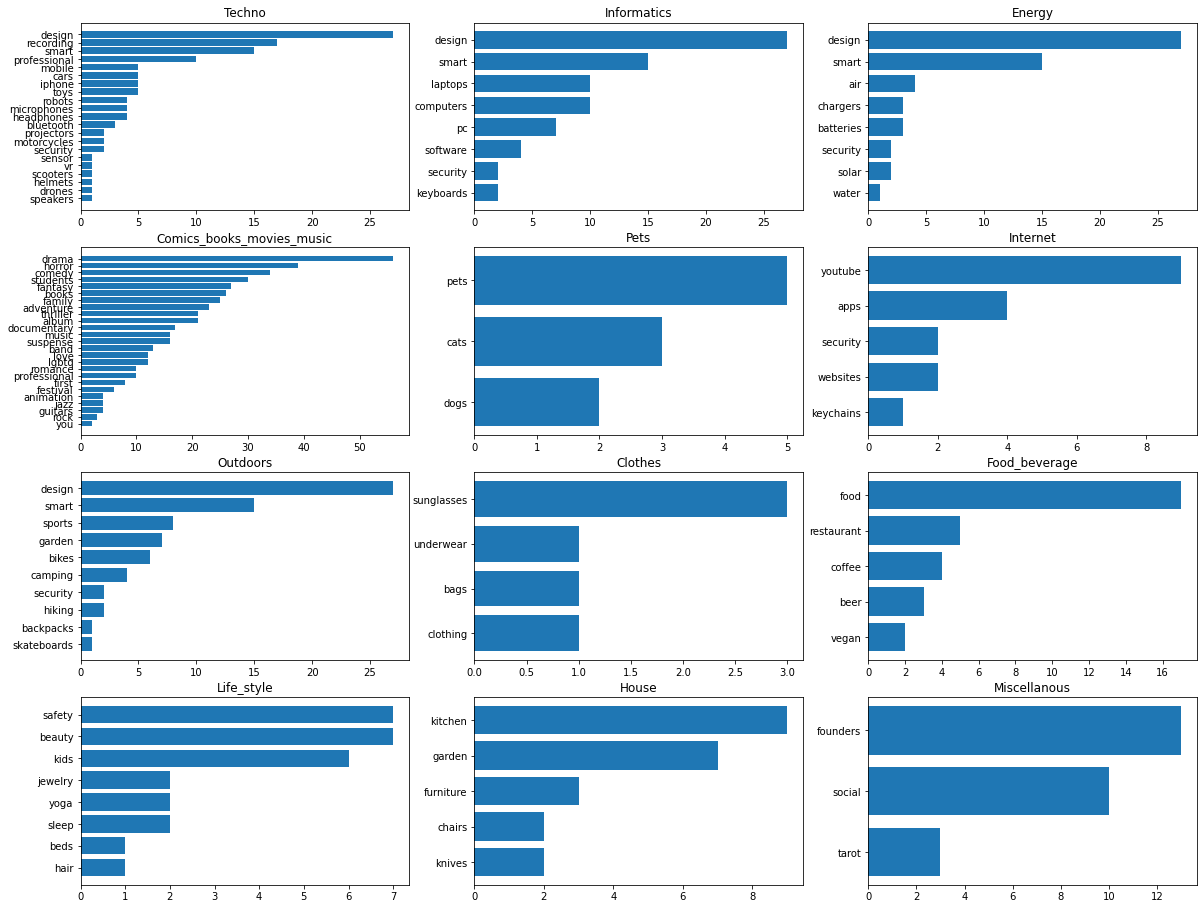

In [22]:
# les listes
meta = [Techno,Informatics,Energy,Comics_books_movies_music,Pets,Internet,Outdoors,Clothes,Food_beverage,Life_style,House,Miscellanous]
meta_name = ['Techno','Informatics','Energy','Comics_books_movies_music','Pets','Internet','Outdoors','Clothes','Food_beverage','Life_style','House','Miscellanous']

# la comptabilisation des occurences
meta_df =[[] for _ in range(len(meta))]

for i in range(len(meta_df)):
    dictouille ={}
    for mot in meta[i]:
        for terme in all_tags:
            if mot ==terme:
                if mot not in dictouille :
                    dictouille[mot]=1
                else:
                    dictouille[mot]+=1
    meta_df[i] = pd.DataFrame.from_dict(dictouille,orient ='index').rename(columns ={0:f'count_{meta_name[i]}'}).sort_values(by=[f'count_{meta_name[i]}'],)

    
# la présentation graphique    
import matplotlib.pyplot as plt

plt.figure(figsize =(20,20))

for i in range(len(meta_df)):
    plt.subplot(5,3,i+1)
    plt.barh(meta_df[i].index,meta_df[i][f'count_{meta_name[i]}'])
    plt.title(meta_name[i])

On rajoute la colonne Catégorie à la base. La catégorie attribuée à un projet est celle pour laquelle les mots clés relevant de la catégorie en question sont majoritaire dans la liste de tag associé au projet.

In [23]:
def filtersss(liste):
    count = [[] for _ in range(len(meta))]
    value =[]
   
    if len(liste) !=0:
        for i in range(len(liste)):
            for j in range(len(meta)):
                if liste[i] in meta[j]:
                    count[j].append(1)
                    
    for table in count:
        value.append(len(table))
    
    A = meta_name[value.index(max(value))]
    value.remove(max(value))
    B = meta_name[value.index(max(value))]
    
  
    if B == 'Comics_books_movies_music':
        return A
    
    if A =='Miscellanous' :
        return B
    
    else:
        return A
        
                
df['categorie'] = df.Tag_cor.apply(lambda x : filtersss(x))            
         

###########################################################################################################################

### III. Analyse et présentation

On procède à l'analyse sur les projets clos, i;e ceux dont la période de collecte est terminée

In [24]:
df_clos = df[df['Duree_restante']==0]

In [25]:
print(f'Nb projet total : {len(df)}')
print(f'Nb projet clos : {len(df_clos)}')

Nb projet total : 328
Nb projet clos : 94


- Pour chaque catégorie, il est pertinent d'afficher:
    - le nombre de backer total
    - les montants appelés
    - les montants obtenus

In [26]:
eval_cat_clos = df_clos.groupby(['categorie']).agg({'categorie':'count','Nb_backers':sum,'objectif_valeur_USD':sum,'montant_collecte_valeur_USD':sum,'Nb_discussion':sum}).sort_values(by=['Nb_backers'],ascending = False)

On  calcule les surplus obtenus en % pour l'ensemble des projets de chaque catégorie

In [27]:
eval_cat_clos['Surplus en %'] = round(100*(eval_cat_clos['montant_collecte_valeur_USD']-eval_cat_clos['objectif_valeur_USD'])/eval_cat_clos['objectif_valeur_USD'])

On calule les dons moyens per backers en fonction de la catégorie

In [28]:
eval_cat_clos['Don moy.'] = eval_cat_clos['montant_collecte_valeur_USD']/eval_cat_clos['Nb_backers']

On calcule le prix moyen d'un projet

In [29]:
eval_cat_clos['Montant OBJECTIF moy. par projet'] = round(eval_cat_clos['objectif_valeur_USD']/eval_cat_clos['categorie'])
eval_cat_clos['Montant REEL moy. par projet'] = round(eval_cat_clos['montant_collecte_valeur_USD']/eval_cat_clos['categorie'])

On affiche la dataframe

In [30]:
eval_cat_clos = eval_cat_clos.rename({'categorie': 'Nb_projet'},axis = 1)

In [31]:
eval_cat_clos

,Nb_projet,Nb_backers,objectif_valeur_USD,montant_collecte_valeur_USD,Nb_discussion,Surplus en %,Don moy.,Montant OBJECTIF moy. par projet,Montant REEL moy. par projet
categorie,,,,,,,,,
Techno,34,87329,820380.00,1.751076e+07,8033,2034.0,200.514851,24129.0,515022.0
Informatics,9,23049,425300.00,8.051674e+06,9731,1793.0,349.328561,47256.0,894630.0
Energy,4,16654,39200.00,1.608018e+06,319,4002.0,96.554461,9800.0,402004.0
Outdoors,6,9216,117500.00,1.370340e+06,365,1066.0,148.691406,19583.0,228390.0
Comics_books_movies_music,35,8855,563075.00,6.774840e+05,201,20.0,76.508639,16088.0,19357.0
Life_style,2,1968,20000.00,3.222000e+05,35,1511.0,163.719512,10000.0,161100.0
Food_beverage,2,1539,170000.00,1.733000e+05,74,2.0,112.605588,85000.0,86650.0
House,1,998,10112.57,2.342071e+05,158,2216.0,234.676474,10113.0,234207.0
Pets,1,462,25000.00,1.007500e+05,0,303.0,218.073593,25000.0,100750.0


On présente sous formes de graphique les analyses portant sur le nombre de backers et les montants en jeu

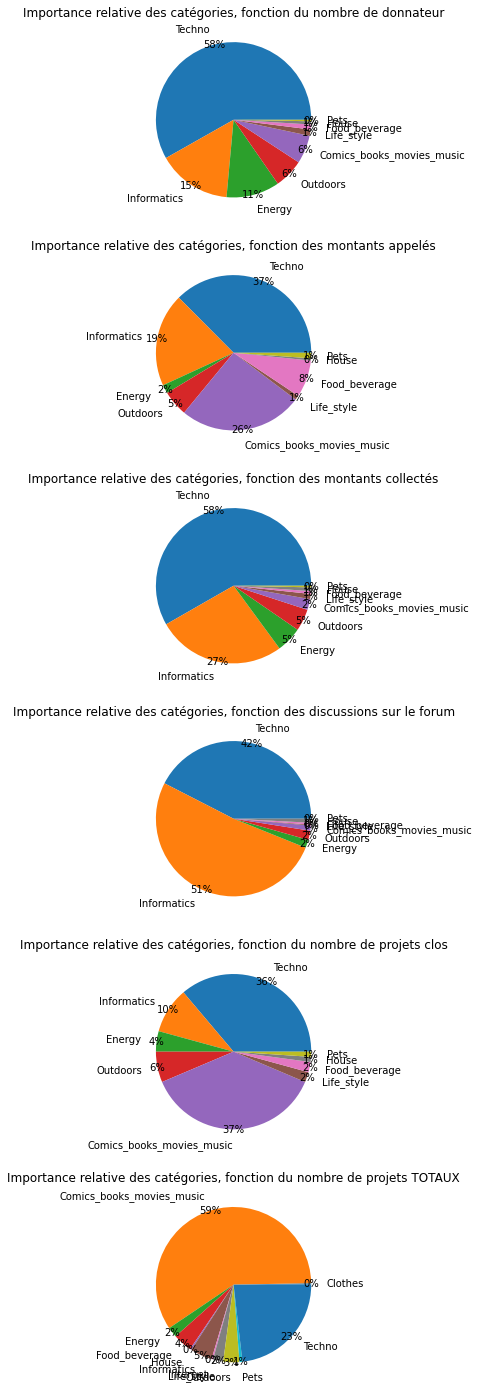

In [32]:
plt.figure(figsize =(10,25))



plt.subplot(6,1,1)
plt.pie(x = eval_cat_clos.Nb_backers,labels =eval_cat_clos.index,autopct = lambda x: str(round(x))+'%',pctdistance = 1,labeldistance = 1.2)
plt.title('Importance relative des catégories, fonction du nombre de donnateur')


plt.subplot(6,1,2)
plt.pie(x = eval_cat_clos.objectif_valeur_USD,labels =eval_cat_clos.index,autopct = lambda x: str(round(x))+'%',pctdistance = 1,labeldistance = 1.2)
plt.title('Importance relative des catégories, fonction des montants appelés')


plt.subplot(6,1,3)
plt.pie(x = eval_cat_clos.montant_collecte_valeur_USD,labels =eval_cat_clos.index,autopct = lambda x: str(round(x))+'%',pctdistance = 1,labeldistance = 1.2)
plt.title('Importance relative des catégories, fonction des montants collectés')


plt.subplot(6,1,4)
plt.pie(x = eval_cat_clos.Nb_discussion,labels =eval_cat_clos.index,autopct = lambda x: str(round(x))+'%',pctdistance = 1,labeldistance = 1.2)
plt.title('Importance relative des catégories, fonction des discussions sur le forum')

plt.subplot(6,1,5)
plt.pie(x = eval_cat_clos.Nb_projet,labels =eval_cat_clos.index,autopct = lambda x: str(round(x))+'%',pctdistance = 1,labeldistance = 1.2)
plt.title('Importance relative des catégories, fonction du nombre de projets clos')


plt.subplot(6,1,6)
eval_cat = df.groupby(['categorie']).agg({'categorie':'count'}).rename({'categorie':'Nb_projet'},axis = 1)

plt.pie(x = eval_cat.Nb_projet,labels =eval_cat.index,autopct = lambda x: str(round(x))+'%',pctdistance = 1,labeldistance = 1.2)
plt.title('Importance relative des catégories, fonction du nombre de projets TOTAUX')
plt.show()

Text(0.5, 1.0, 'Nb de projet par catégorie')

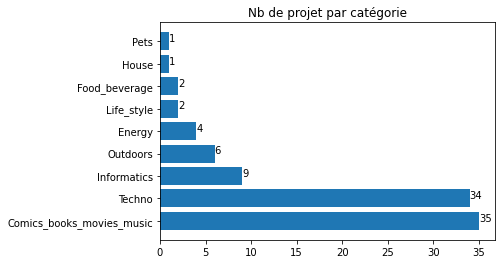

In [33]:

plt.barh(df_clos.categorie.value_counts().index,df_clos.categorie.value_counts().values)
for i in range(len(df_clos.categorie.value_counts().index)):
    plt.text(df_clos.categorie.value_counts().values[i],i,df_clos.categorie.value_counts().values[i])
    
plt.title( 'Nb de projet par catégorie')

On s'intéresse à la distribution des projets, sur l'ensemble de la base

### CONCLUSION:

- Les projets informatiques:
    - attirent le plus de backers -> les 3/4 des bakcers donnent pour des sujets informatiques
    - génèrent le plus de discussions sur les forums internes du site (environ la moitié du traffic)
    
